## Gene Set Enrichment Analysis
We use this notebook to show that the small sample lymphocyte proteomics data is in fact representative of lymphocytes specifically.

In [1]:
import load_data
data = load_data.load_max_quant()

Here we use a function from load_data to get the names, both the gene name code and verbose headers. We then add these to the quantification data.

In [2]:
names = load_data.names_max_quant()
data['Names'] = names['Gene names']
data['Header'] = names['Fasta headers']

Now we can run Gene Set Enrichment Analysis (GSEA) on the proteins identified.

In [3]:
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt


In [4]:
genesets = [
    'WikiPathways_2019_Human',  #
    #'BioPlanet_2019',   
    'ProteomicsDB_2020',    
    #'CCLE_Proteomics_2020', #says Hematopoetic and Lymphoid Tissues
    'GO_Molecular_Function_2018',
]


We use the ProteomicsDB_2020 genesets, which compare our samples to documented lineages. The following plots show that the lymphocytes we measured are highly similar to several lymphoblastoid cell lines. Bones share a similarity as well, due to XXX

WikiPathways_2019_Human


,Term,Adjusted P-value
0,Cytoplasmic Ribosomal Proteins WP477,3.666945e-65
1,Proteasome Degradation WP183,3.184219e-29
2,mRNA Processing WP411,4.541508e-27
3,Metabolic reprogramming in colon cancer WP4290,4.138641e-20
4,TCA Cycle (aka Krebs or citric acid cycle) WP78,1.650118e-14
5,Parkin-Ubiquitin Proteasomal System pathway WP...,3.855743e-13
6,Translation Factors WP107,2.213909e-09
7,Amino Acid metabolism WP3925,2.139332e-09
8,TCA Cycle and Deficiency of Pyruvate Dehydroge...,4.098155e-09
9,Glycolysis and Gluconeogenesis WP534,9.138374e-09


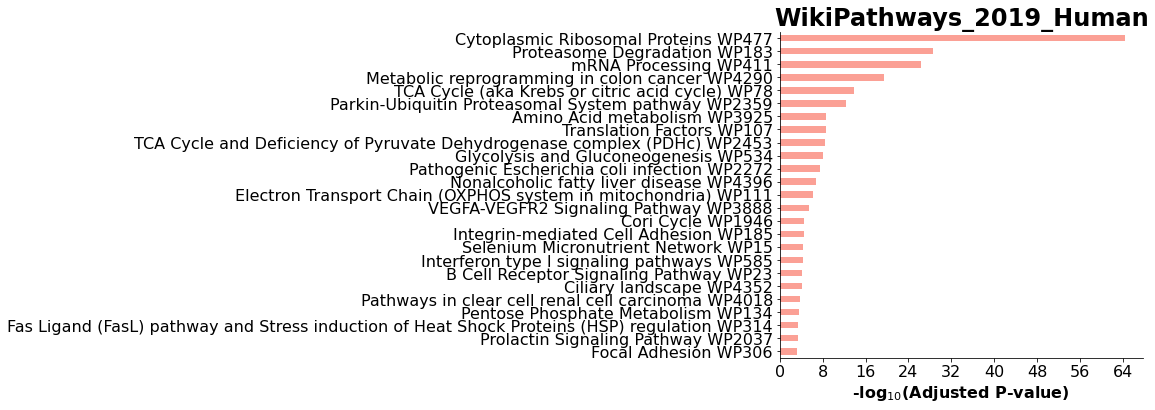

ProteomicsDB_2020


,Term,Adjusted P-value
0,Bone U2-OS BTO:0001938 CYTO BioRep1 heavy,2.986548e-58
1,Bone U2-OS BTO:0001938 CYTO BioRep1 light,1.493274e-58
2,Bone U2-OS BTO:0001938 CYTO BioRep1 medium,9.955160e-59
3,Lymphoblastoid BTO:0000773 X129.126 HM11.GM18552,1.545472e-56
4,Hematopoietic MOLT-4 BTO:0000873 P003361,5.629868e-56
5,Lymphoblastoid BTO:0000773 X126.126 HM11.GM12878,4.980501e-54
6,Lymphoblastoid BTO:0000773 X127.126 HM11.GM12878,9.293824e-53
7,Lymphoblastoid BTO:0000773 X128.126 HM11.GM12878,8.132096e-53
8,Lymphoblastoid BTO:0000773 X130.126 HM11.GM18522,7.228529e-53
9,Lymphoblastoid BTO:0000773 X131.126 HM11.GM10847,9.902667e-53


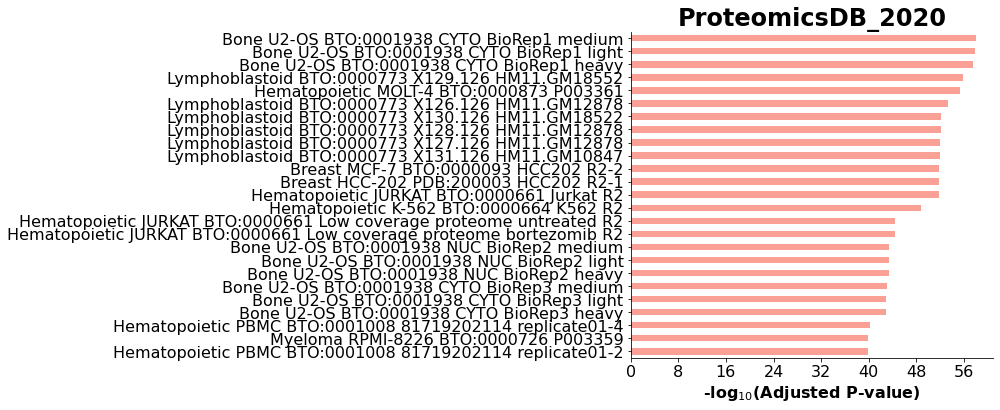

GO_Molecular_Function_2018


,Term,Adjusted P-value
0,RNA binding (GO:0003723),9.212883e-136
1,cadherin binding (GO:0045296),7.319458e-43
2,mRNA binding (GO:0003729),2.570375e-16
3,actin filament binding (GO:0051015),1.757691e-13
4,actin binding (GO:0003779),9.331024e-13
5,ATPase activity (GO:0016887),1.347136e-09
6,nucleoside-triphosphatase activity (GO:0017111),2.023442e-08
7,protein homodimerization activity (GO:0042803),6.159628e-07
8,"translation factor activity, RNA binding (GO:0...",5.784257e-07
9,proteasome-activating ATPase activity (GO:0036...,4.283289e-06


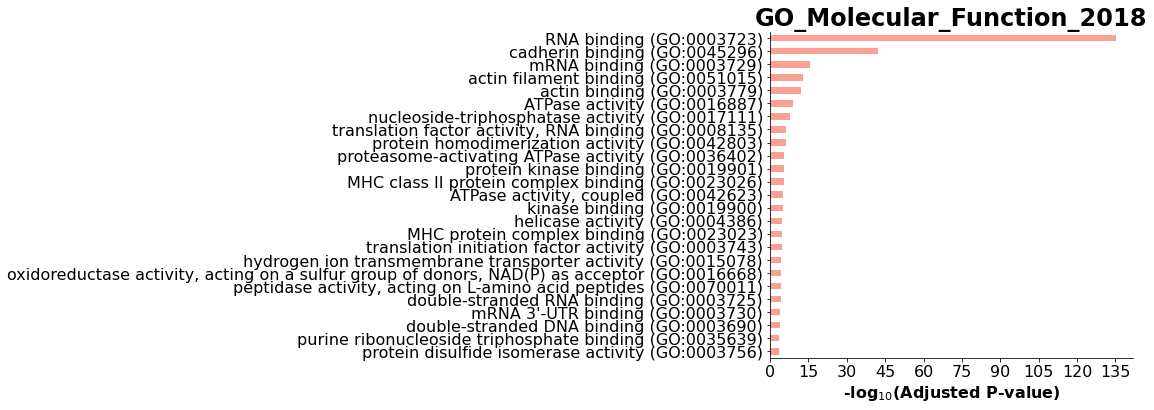

In [6]:
for gset in genesets:
    enr = gp.enrichr(gene_list=list(data.Names.dropna()), 
                   description="Lymphocytes",
                   gene_sets=gset,
                   outdir='/data/test/enrichr'
                )
    
    #as table:
    print(gset)
    display(enr.res2d[['Term','Adjusted P-value']][0:20])
    
    #as barplot
    barplot(enr.res2d, title=gset, top_term=25)
    plt.show()
#plt.savefig('data/gsea_all.png')